## Degrees Dataset Exploratory Analysis ##

In [1]:
from LoadData import load_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load in the dataframes
dataframes = load_data()

# read in acquisitions dataframe
dg = dataframes['degrees']

c:\Users\Eilhart\Documents\OceanDataChallenges\VentureCapital\ExploratoryDataAnalysis\LoadData.py:34: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [3]:
#print dataframe basic info
print(dg.head())
print(dg.tail())
print(dg.info())
print(dg.columns)

   id object_id degree_type                       subject   
0   1    p:6117         MBA                           NaN  \
1   2    p:6136          BA               English, French   
2   3    p:6136          MS            Mass Communication   
3   4    p:6005          MS           Internet Technology   
4   5    p:5832         BCS  Computer Science, Psychology   

                        institution graduated_at           created_at   
0                               NaN          NaN  2008-02-19 03:17:36  \
1  Washington University, St. Louis   1990-01-01  2008-02-19 17:58:31   
2                 Boston University   1992-01-01  2008-02-19 17:58:31   
3           University of Greenwich   2006-01-01  2008-02-19 23:40:40   
4                   Rice University          NaN  2008-02-20 05:28:09   

            updated_at  
0  2008-02-19 03:17:36  
1  2008-02-25 00:23:55  
2  2008-02-25 00:23:55  
3  2008-02-25 00:23:55  
4  2008-02-20 05:28:09  
            id object_id degree_type        

- Degrees dataset has 109608 rows and 8 columns ['id', 'object_id', 'degree_type', 'subject', 'institution',
    'graduated_at', 'created_at', 'updated_at'].
- Degrees has an object_id column we can seemingly use a key value to join on the people table.

### Explore the degree types ###

In [ ]:
# Print unique values in degree_type column
print(dg['degree_type'].unique().tolist())

# Define the buckets and their corresponding values
buckets = {
    'High School': ['High School', 'High School Diploma', 'High School Degree', 'Secondary School', 'SSCE', 'GED'],
    'Associates': ['Associate', 'Associates', 'AA', 'AAS', 'AS', 'Associate of Arts', 'Associate of Science', 'Associate Degree'],
    'Bachelors': ['Bachelor', 'Bachelors', 'BA', 'BS', 'BBA', 'BSc', 'AB', 'BEng', 'BTech', 'undergraduate', "Bachelor's", 'Bachelor of Science', 'Bachelor of Arts', 'Bachelor of Engineering', 'B.A.', 'B.S.', 'B.E.', 'B.Tech.'],
    'Masters': ['Master', 'Masters', 'MA', 'MS', 'MBA', 'MIM', 'MSc', 'SM', "Master's", 'Master of Science', 'Master of Arts', 'Master of Engineering', 'M.S.', 'M.A.', 'M.Eng.'],
    'Doctorate': ['PhD', 'Ph.D.', 'Doctorate', 'doctoral', 'D.Sc.', 'DPhil', 'MD', 'Doctor of Philosophy', 'M.D.', 'Juris Doctor', 'J.D.', 'Pharm.D.', 'DrPH', 'Ed.D.', 'D.O.', 'DDS', 'DMD', 'DVM', 'Doctor of Medicine', 'Doctor of Pharmacy','JD', 'MD'],
    'Professional': ['LLB', 'LLM', 'CFA', 'CPA', 'CA'],
    'Certificate': ['Certificate', 'Certification'],
}

# Function to map degree types to buckets
def map_to_bucket(degree):
    for bucket, values in buckets.items():
        if any(value.lower() in str(degree).lower() for value in values):
            return bucket
    return 'Other'

# Apply the mapping function to the 'degree_type' column
dg['degree_bucket'] = dg['degree_type'].apply(map_to_bucket)

# Count the occurrences of each degree bucket
bucket_counts = dg['degree_bucket'].value_counts()

# Calculate the percentage of each bucket
total_count = bucket_counts.sum()
percentages = bucket_counts / total_count * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(bucket_counts.index, bucket_counts.values)
plt.xlabel('Degree Bucket')
plt.ylabel('Count')
plt.title('Total Count and Percentage of Degree Buckets')
plt.xticks(rotation=45)

# Set the y-axis limit to 80,000
plt.ylim(0, 70000)

# Add count and percentage labels above each bar
for bar, count, percentage in zip(bars, bucket_counts.values, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{count}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- Grouped the degrees by buckets to identify distribution of degree types
- The majority (56%) of degrees held are Bachelor's degrees. A miniscule amount only have a high school degree (0.1%). 22.4% of degrees are Master's, Doctorate, or           Professional.

### Explore the institutions the degrees ###

In [22]:
# Print unique values in degree_type column
# print(dg['institution'].unique().tolist())

# Define a list of Ivy League school names or keywords
ivy_league_keywords = ['yale', 'harvard', 'princeton', 'columbia', 'brown', 'dartmouth', 'upenn', 'penn', 'cornell']

# Function to check if an institution is Ivy League
def is_ivy_league(institution):
    if pd.isna(institution):
        return 0
    for keyword in ivy_league_keywords:
        if keyword in institution.lower():
            return 1
    return 0

# Apply the is_ivy_league function to the 'institution' column
dg['is_ivy_league'] = dg['institution'].apply(is_ivy_league)

print(dg['is_ivy_league'].sum())
print(dg['is_ivy_league'].sum() / len(dg.index))

12305
0.1122616549584892


- 12,305 of the 109,608 data points (or 11.23%) contained affilitation to an ivy league degree.

### Explore graduation years ###

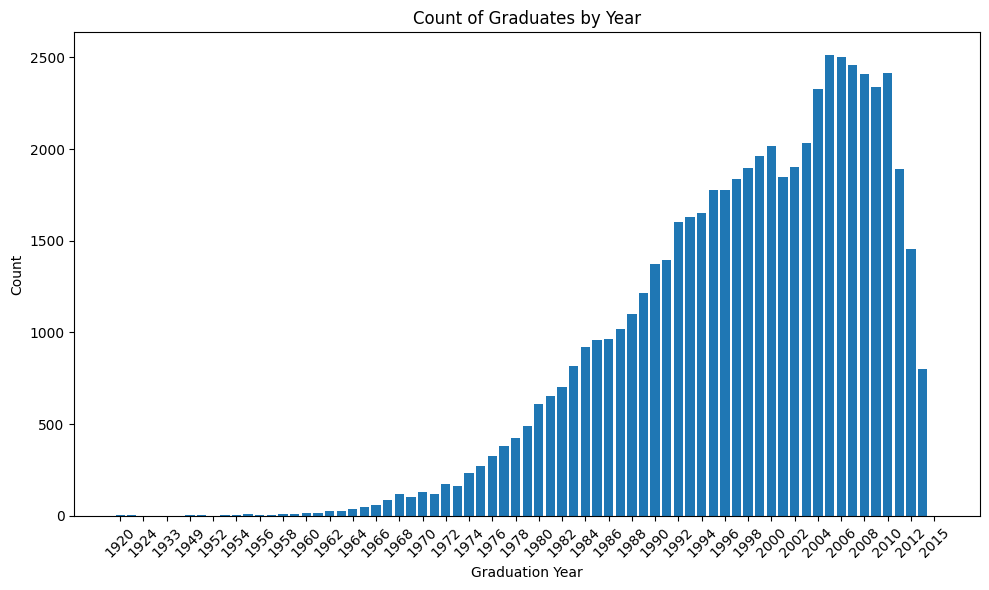

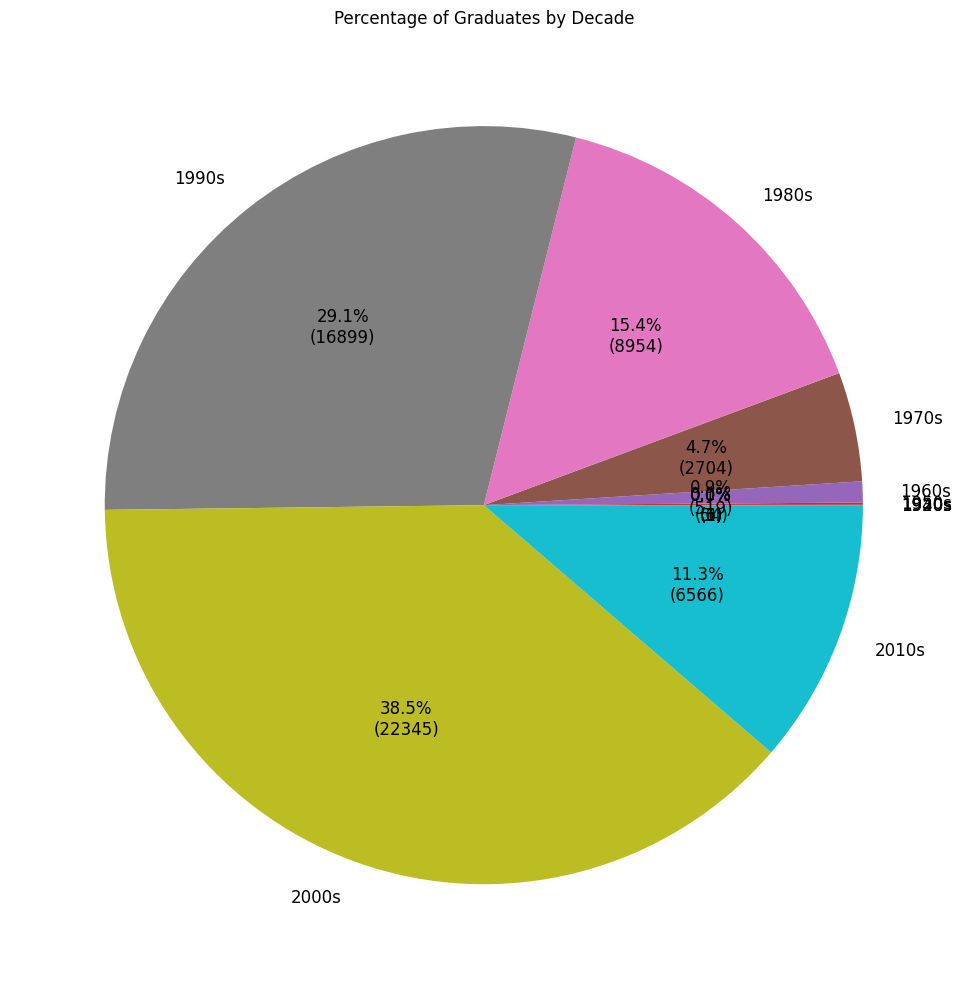

In [21]:
# Extract the year of graduation from the 'graduated_at' column
dg['graduation_year'] = dg['graduated_at'].str[:4]

# Count the occurrences of each graduation year
year_counts = dg['graduation_year'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Graduation Year')
plt.ylabel('Count')
plt.title('Count of Graduates by Year')

# Set the x-axis ticks to show every other year
years = sorted(year_counts.index.unique())
plt.xticks(range(0, len(years), 2), years[::2], rotation=45)

plt.tight_layout()
plt.show()

# Group the graduation years by decade
dg['decade'] = pd.to_datetime(dg['graduation_year'], format='%Y').dt.year // 10 * 10
decade_counts = dg['decade'].value_counts().sort_index()

# Calculate the percentage of each decade
total_count = decade_counts.sum()
percentages = decade_counts / total_count * 100

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(decade_counts, labels=[f'{int(decade)}s' for decade in decade_counts.index],
        autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*total_count)})',
        textprops={'fontsize': 12})
plt.title('Percentage of Graduates by Decade')
plt.tight_layout()
plt.show()

### Initial takeaways from graduation dataset ###
- The majority of degrees held are bachelor's degrees (56%), 22.4% are Graduate or Professional degrees, while less than .1% are high school.
- 11.23% of degrees are affiliated with an ivy league school
- 49.8% of degrees were distributed after 2000. Of the remaining, 44.5% of degrees were distributed in the 1990s or 1980s.